# Paddy Doctor 

Paddy Doctor: Paddy Disease Classification


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paddy-disease-classification/sample_submission.csv
/kaggle/input/paddy-disease-classification/train.csv
/kaggle/input/paddy-disease-classification/train_images/tungro/109629.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/104765.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/109706.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/100098.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/102734.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/106433.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/108930.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/102019.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/102416.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/101046.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/108310.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/10402

In [2]:
## Import libraries
import tensorflow as tf
import keras
from tensorflow.keras import layers

### Paddy Doctor: Paddy Disease Classification
Identify the type of disease present in paddy leaf images
 


## Load the Dataset

In [3]:
train_dir = '/kaggle/input/paddy-disease-classification/train_images/'
test_dir = '/kaggle/input/paddy-disease-classification/test_images/'

In [4]:
img_height = 224
img_width = 224
batch_size = 32

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


2022-07-28 11:47:28.407678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 11:47:28.502715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 11:47:28.503955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 11:47:28.510299: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
val_data = tf.keras.utils.image_dataset_from_directory(directory='/kaggle/input/paddy-disease-classification/train_images/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [7]:
len(train_data)

261

In [8]:
len(val_data)

66

In [9]:
class_names = train_data.class_names
class_names

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

2022-07-28 11:47:31.333441: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


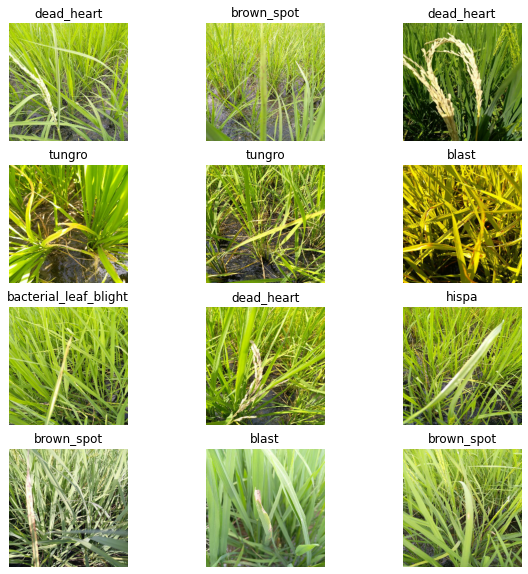

In [10]:
## Visualise Dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Build a Normalisation layer**

In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


#### Add better Performance

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
train_data

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [14]:
base_model = tf.keras.applications.ResNet50(include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [15]:
base_model

In [16]:
##Freeze Layers
# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

In [17]:
inputs = layers.Input(shape=(img_width, img_height, 3))
x = normalization_layer(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f'shape after GlobalAverage{x.shape}')
# The output activation layer
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
print(f'shape after GlobalAverage{outputs.shape}')
model_0 = keras.Model(inputs, outputs, name='model_0')

shape after GlobalAverage(None, 2048)
shape after GlobalAverage(None, 10)


In [18]:
model_0.summary()

Model: "model_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
#Compile the model
model_0.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [20]:
val_data

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
history_0 = model_0.fit(train_data,epochs=100,validation_data=val_data)

Epoch 1/100
261/261 [==============================] - 18s 70ms/step - loss: 1.6092 - accuracy: 0.4544 - val_loss: 1.6542 - val_accuracy: 0.4339
Epoch 2/100
261/261 [==============================] - 18s 69ms/step - loss: 1.6027 - accuracy: 0.4600 - val_loss: 1.6487 - val_accuracy: 0.4368
Epoch 3/100
261/261 [==============================] - 18s 69ms/step - loss: 1.5963 - accuracy: 0.4622 - val_loss: 1.6434 - val_accuracy: 0.4397
Epoch 4/100
261/261 [==============================] - 18s 70ms/step - loss: 1.5901 - accuracy: 0.4650 - val_loss: 1.6381 - val_accuracy: 0.4431
Epoch 5/100
261/261 [==============================] - 18s 69ms/step - loss: 1.5841 - accuracy: 0.4679 - val_loss: 1.6330 - val_accuracy: 0.4445
Epoch 6/100
261/261 [==============================] - 18s 70ms/step - loss: 1.5782 - accuracy: 0.4703 - val_loss: 1.6280 - val_accuracy: 0.4455
Epoch 7/100
261/261 [==============================] - 18s 69ms/step - loss: 1.5724 - accuracy: 0.4725 - val_loss: 1.6232 - val_ac

In [ ]:
import pandas as pd
metrics_0 = pd.read_csv(history_0)
metrics_0.plot()

In [ ]:
model_0.evaluate(val_data)

In [ ]:
base_model_1 = tf.keras.applications.EfficientNetB5(include_top=False)
inputs = layers.Input(shape=(img_width, img_height, 3))
x = normalization_layer(inputs)
x = base_model_1(x)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f'shape after GlobalAverage{x.shape}')
# The output activation layer
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
print(f'shape after GlobalAverage{outputs.shape}')
model_1 = keras.Model(inputs, outputs, name='model_2')

In [ ]:
model_1.summary()

In [ ]:
#Compile the model
model_1.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data,epochs=100,validation_data=val_data)